# Yemen: Cholera Outbreak Epidemiology Update Data 

# The Humanitarian Data Exchange 

### https://data.humdata.org/dataset/yemen-cholera-outbreak-daily-epidemiology-update

In [291]:
from os import path
fname = path.expanduser('~/Desktop/OpenData/YemenCholeraOutbreakEpidemiologyDataGovernorate_Level.csv')

In [292]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
from pandas import Series, DataFrame

In [293]:
#Define date format for first variable
#import datetime
df = pd.read_csv(fname,parse_dates=[0])

In [294]:
df.head()

,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2017-10-22,Amran,"84,410",170,0.20,72.732,Amran,عمران,29.0
1,2017-10-22,Al Mahwit,"49,611",142,0.29,67.941,Al Mahwit,المحويت,27.0
2,2017-10-22,Al Dhale'e,"45,521",80,0.18,62.230,Al Dhale'e,الضالع,30.0
3,2017-10-22,Abyan,"27,675",35,0.13,48.482,Abyan,أبين,12.0
4,2017-10-22,Sana'a,"63,136",122,0.19,42.940,Sana'a,صنعاء,23.0


In [295]:
df.columns=['Date','Governorate','Cases','Deaths','CFR','AttackRate','COD Gov English','COD Gov Arabic','COD Gov Pcode']

In [296]:
# Remove comma from 'Cases' and 
df['Cases'] = df['Cases'].str.replace(',', '')
df.head()

,Date,Governorate,Cases,Deaths,CFR,AttackRate,COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2017-10-22,Amran,84410,170,0.20,72.732,Amran,عمران,29.0
1,2017-10-22,Al Mahwit,49611,142,0.29,67.941,Al Mahwit,المحويت,27.0
2,2017-10-22,Al Dhale'e,45521,80,0.18,62.230,Al Dhale'e,الضالع,30.0
3,2017-10-22,Abyan,27675,35,0.13,48.482,Abyan,أبين,12.0
4,2017-10-22,Sana'a,63136,122,0.19,42.940,Sana'a,صنعاء,23.0


In [297]:
# Convert Cases to integer
df['Cases'] = pd.to_numeric(df['Cases'])
df['Cases'].dtypes

dtype('int64')

In [298]:
df.Governorate.describe()

count           2452
unique            26
top       Al Dhale'e
freq             115
Name: Governorate, dtype: object

In [299]:
GovList = df.Governorate.unique()
dims = GovList.shape
GovListlength = dims[0]
print("Number of governorates = ", GovListlength)
GovList

Number of governorates =  26


array(['Amran', 'Al Mahwit', "Al Dhale'e", 'Abyan', "Sana'a", 'Hajjah',
       'Dhamar', 'Al Hudaydah', 'Al Bayda', 'Amanat Al Asimah', 'Lahj',
       'Al Jawf', 'Raymah', 'Aden', 'Ibb', 'Taizz', 'Marib', "Sa'ada",
       'Al Maharah', 'Shabwah', 'Moklla', "Say'on", 'Al-Hudaydah',
       'Al_Jawf', "Ma'areb", 'AL Mahrah'], dtype=object)

In [300]:
# Total values per Governorate
# Sorted by no. Cases 
df2 = df.groupby(df['Governorate'])

df2sum = df2.sum()
df2cases = df2sum.sort_values(['Cases'], ascending=[False])
df2cases

,Cases,Deaths,CFR,AttackRate,COD Gov Pcode
Governorate,,,,,
Amanat Al Asimah,6380336,6847,13.49,2104.404,1495.0
Hajjah,6071182,38340,92.11,2614.043,1955.0
Amran,5678096,17129,44.22,4423.433,3335.0
Al Hudaydah,5289797,14935,17.88,1626.021,1098.0
Dhamar,4557935,14511,54.54,2224.774,2300.0
Ibb,3879774,26806,97.08,1290.990,1265.0
Sana'a,3599614,12729,52.56,2610.434,2645.0
Taizz,3565625,17797,64.08,1182.124,1725.0
Al Mahwit,3220612,13723,62.02,4328.959,3105.0


In [301]:
df.index = df.Governorate
Governorate = df['Governorate']

# make collection of dataframes for each governorate
dataframe_collection = {} 

for i in range(0,GovListlength):
    dataframe_collection[i] = df[Governorate==GovList[i]]

In [302]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]
plt.style.use('seaborn-whitegrid')

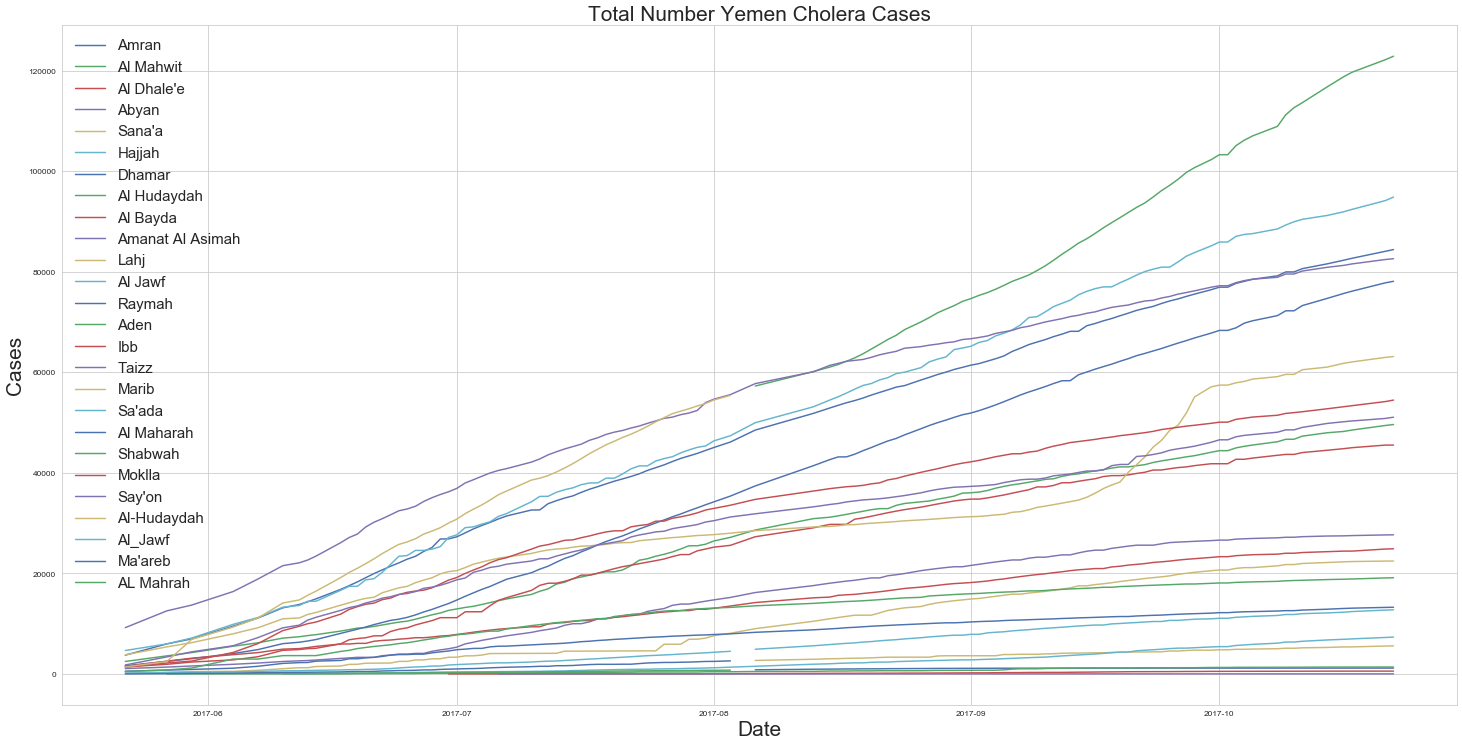

In [303]:
# Plot cholera cases for each governorate
variableToPlot = 'Cases'
fig2 = plt.figure(figsize=(30,15), dpi=60)

for i in range(0,GovListlength):
    plt.plot(dataframe_collection[i]['Date'], dataframe_collection[i][variableToPlot], label=GovList[i])

plt.title('Total Number Yemen Cholera %s' %variableToPlot ,fontsize=25)
plt.ylabel(variableToPlot,fontsize=25)
plt.xlabel('Date',fontsize=25)
plt.legend(prop={'size': 18})

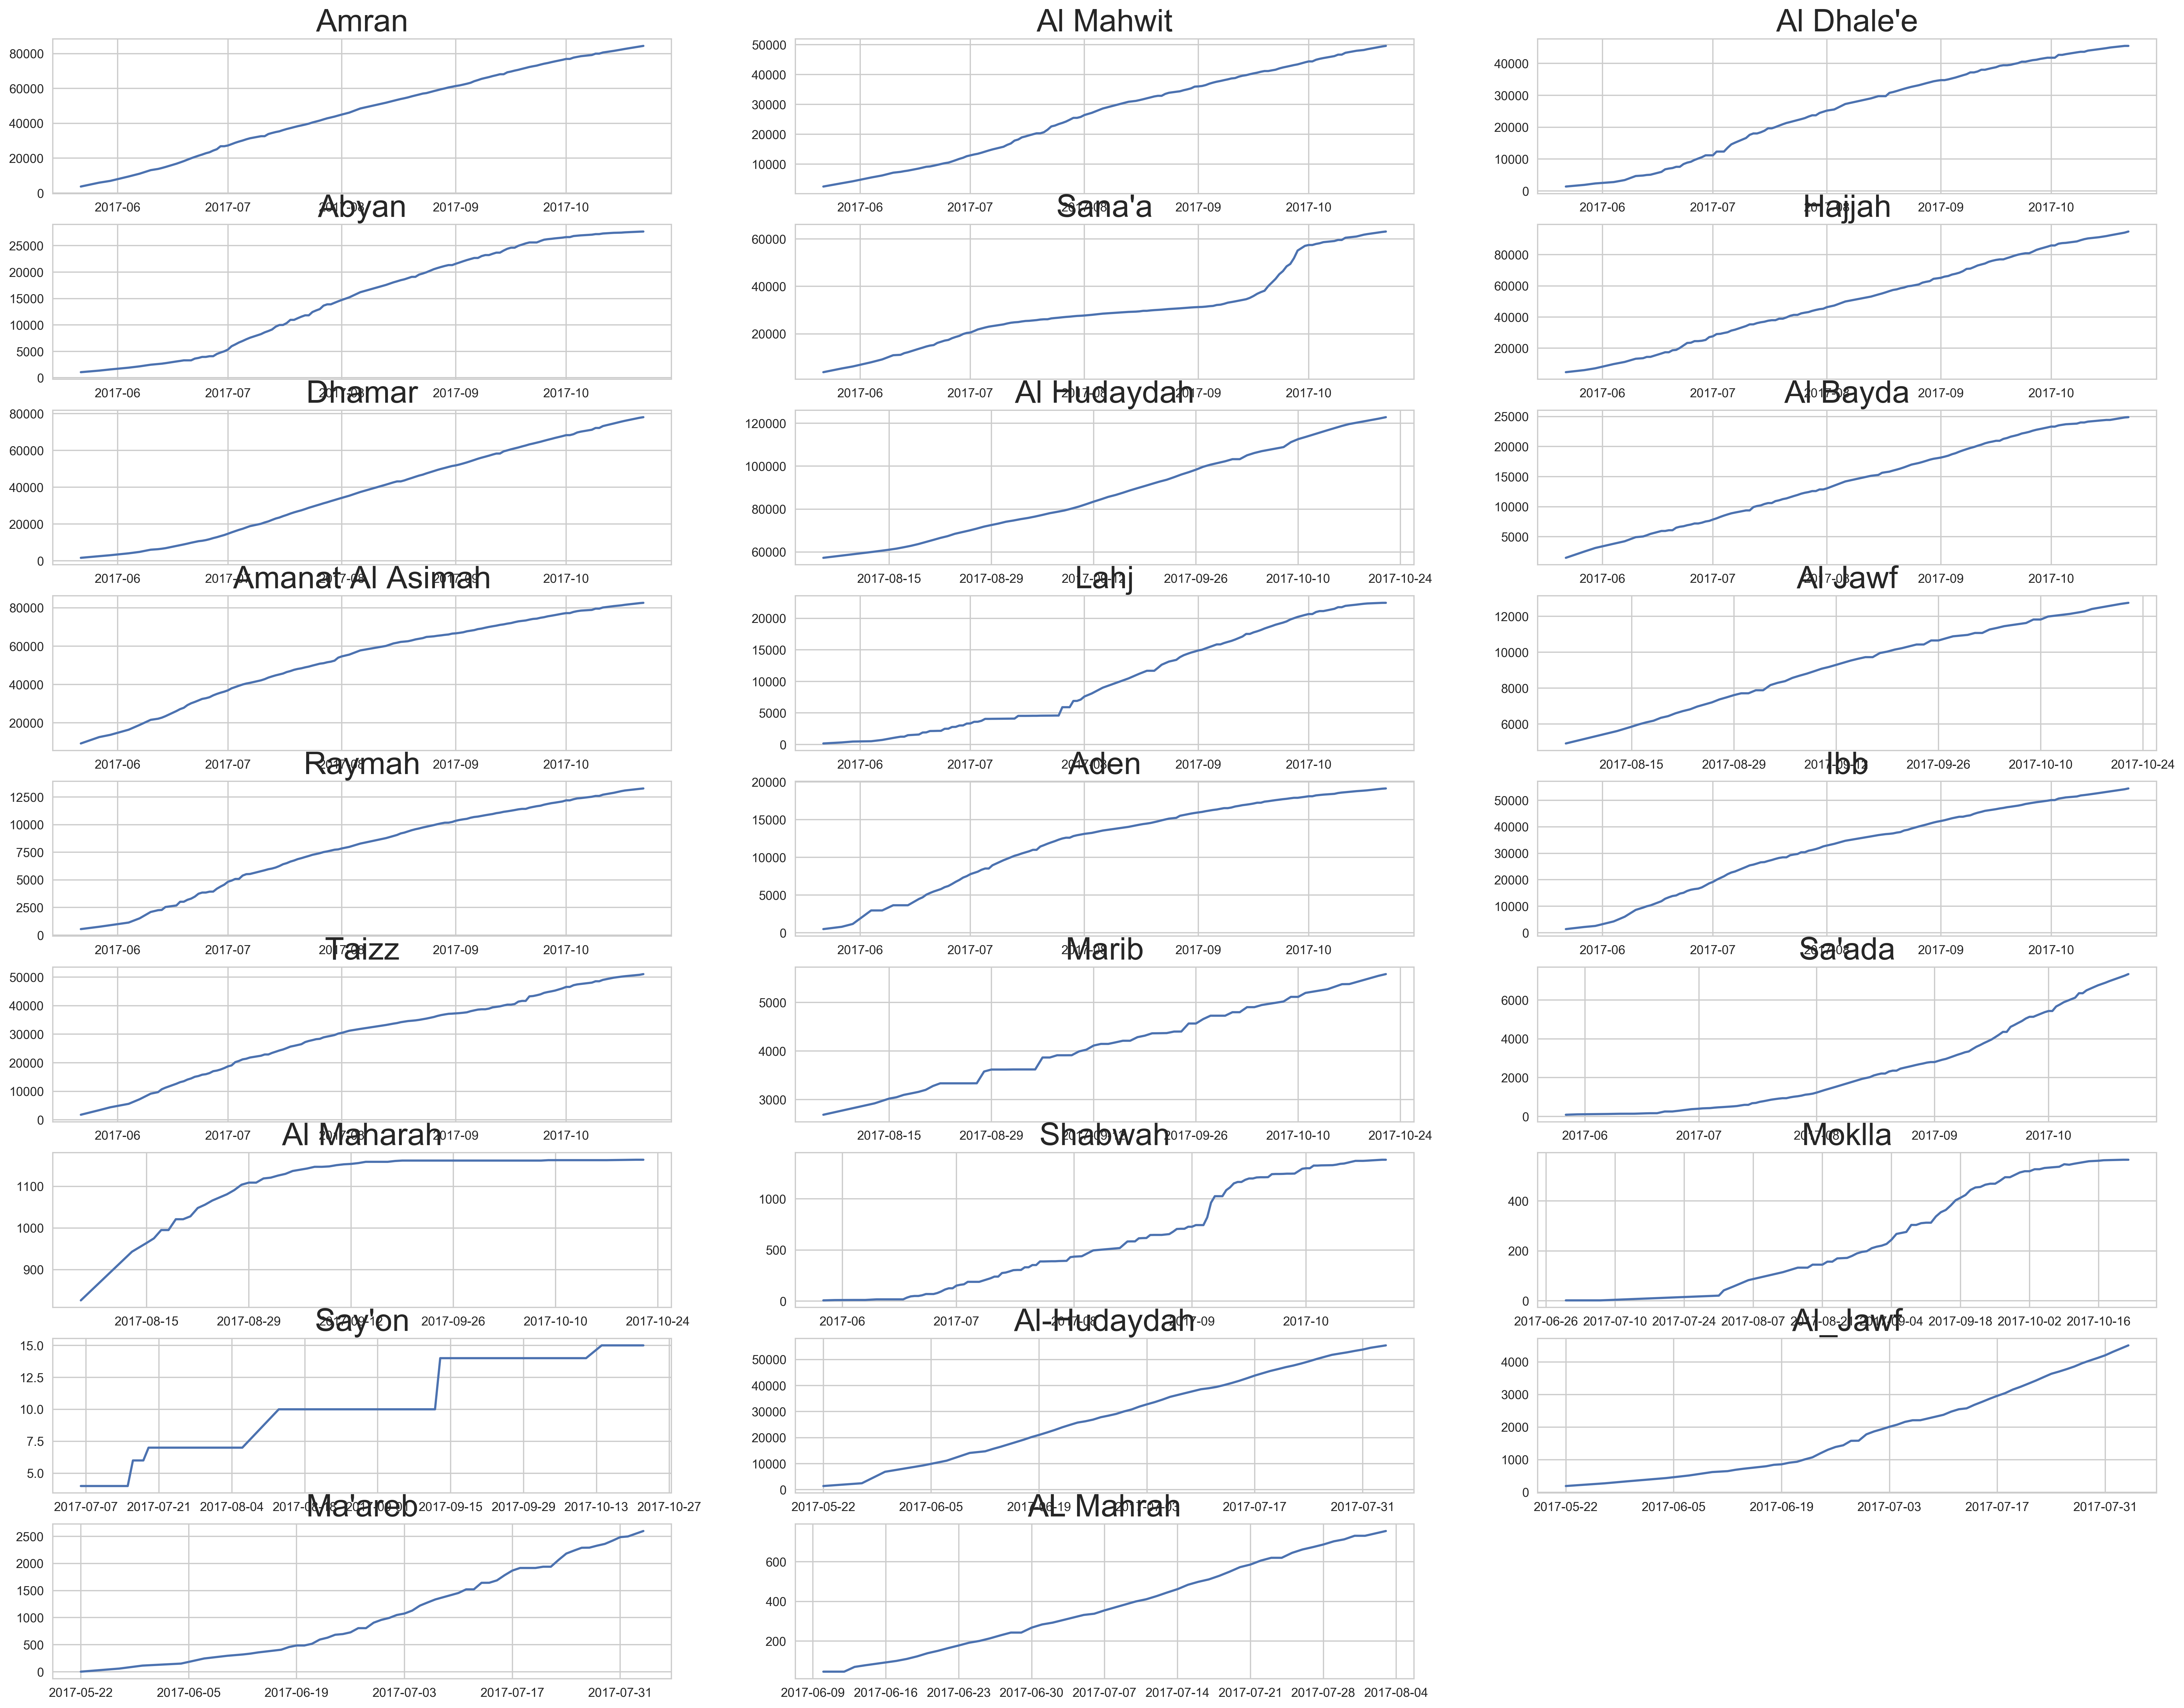

In [304]:
fig3 = plt.figure(figsize=(30,24), dpi=300)

nColumns = 3
nRows = 9
for i in range(0,GovListlength):
        
    ax = plt.subplot2grid((nRows,nColumns),(i//nColumns,i%nColumns))
    plt.plot(dataframe_collection[i]['Date'], dataframe_collection[i][variableToPlot])
    #plt.ylim((0,125000))
    plt.title(GovList[i],fontsize=25)  

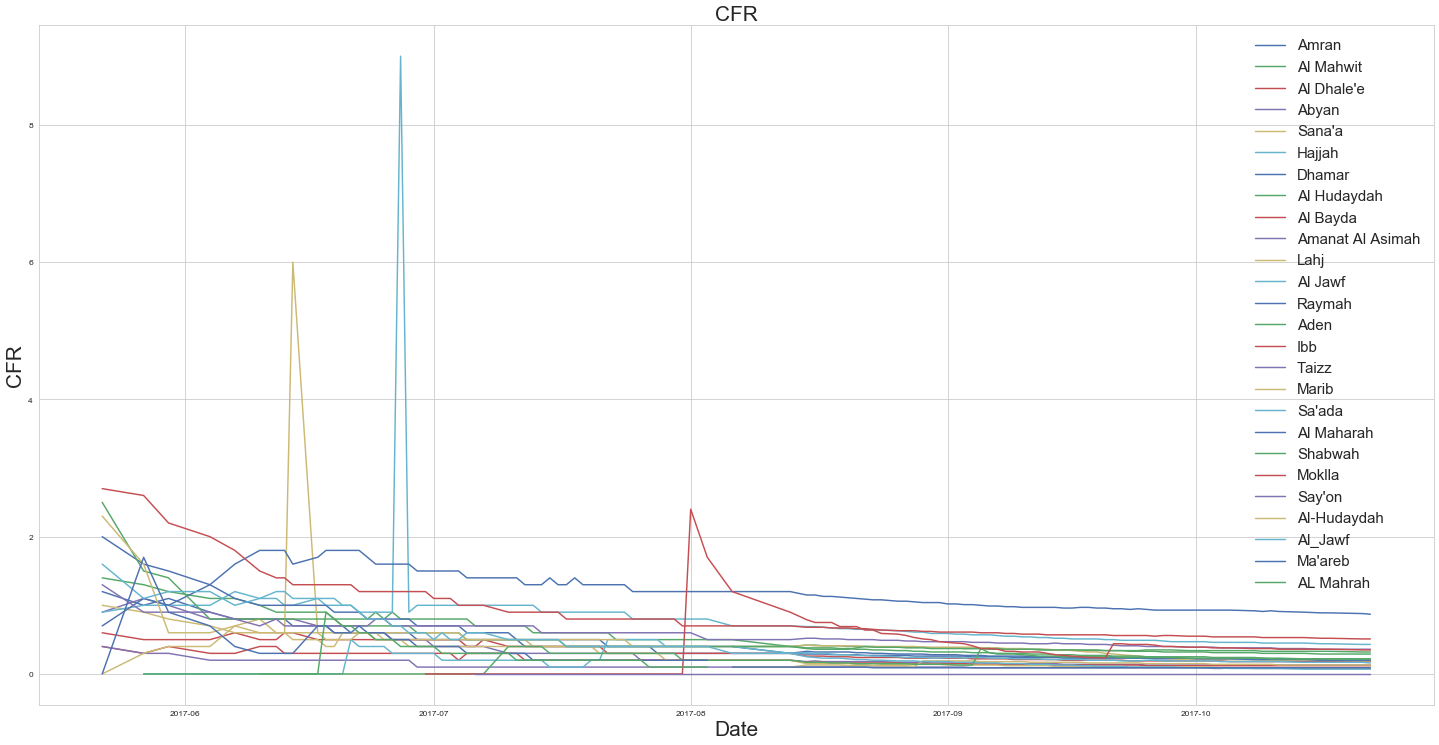

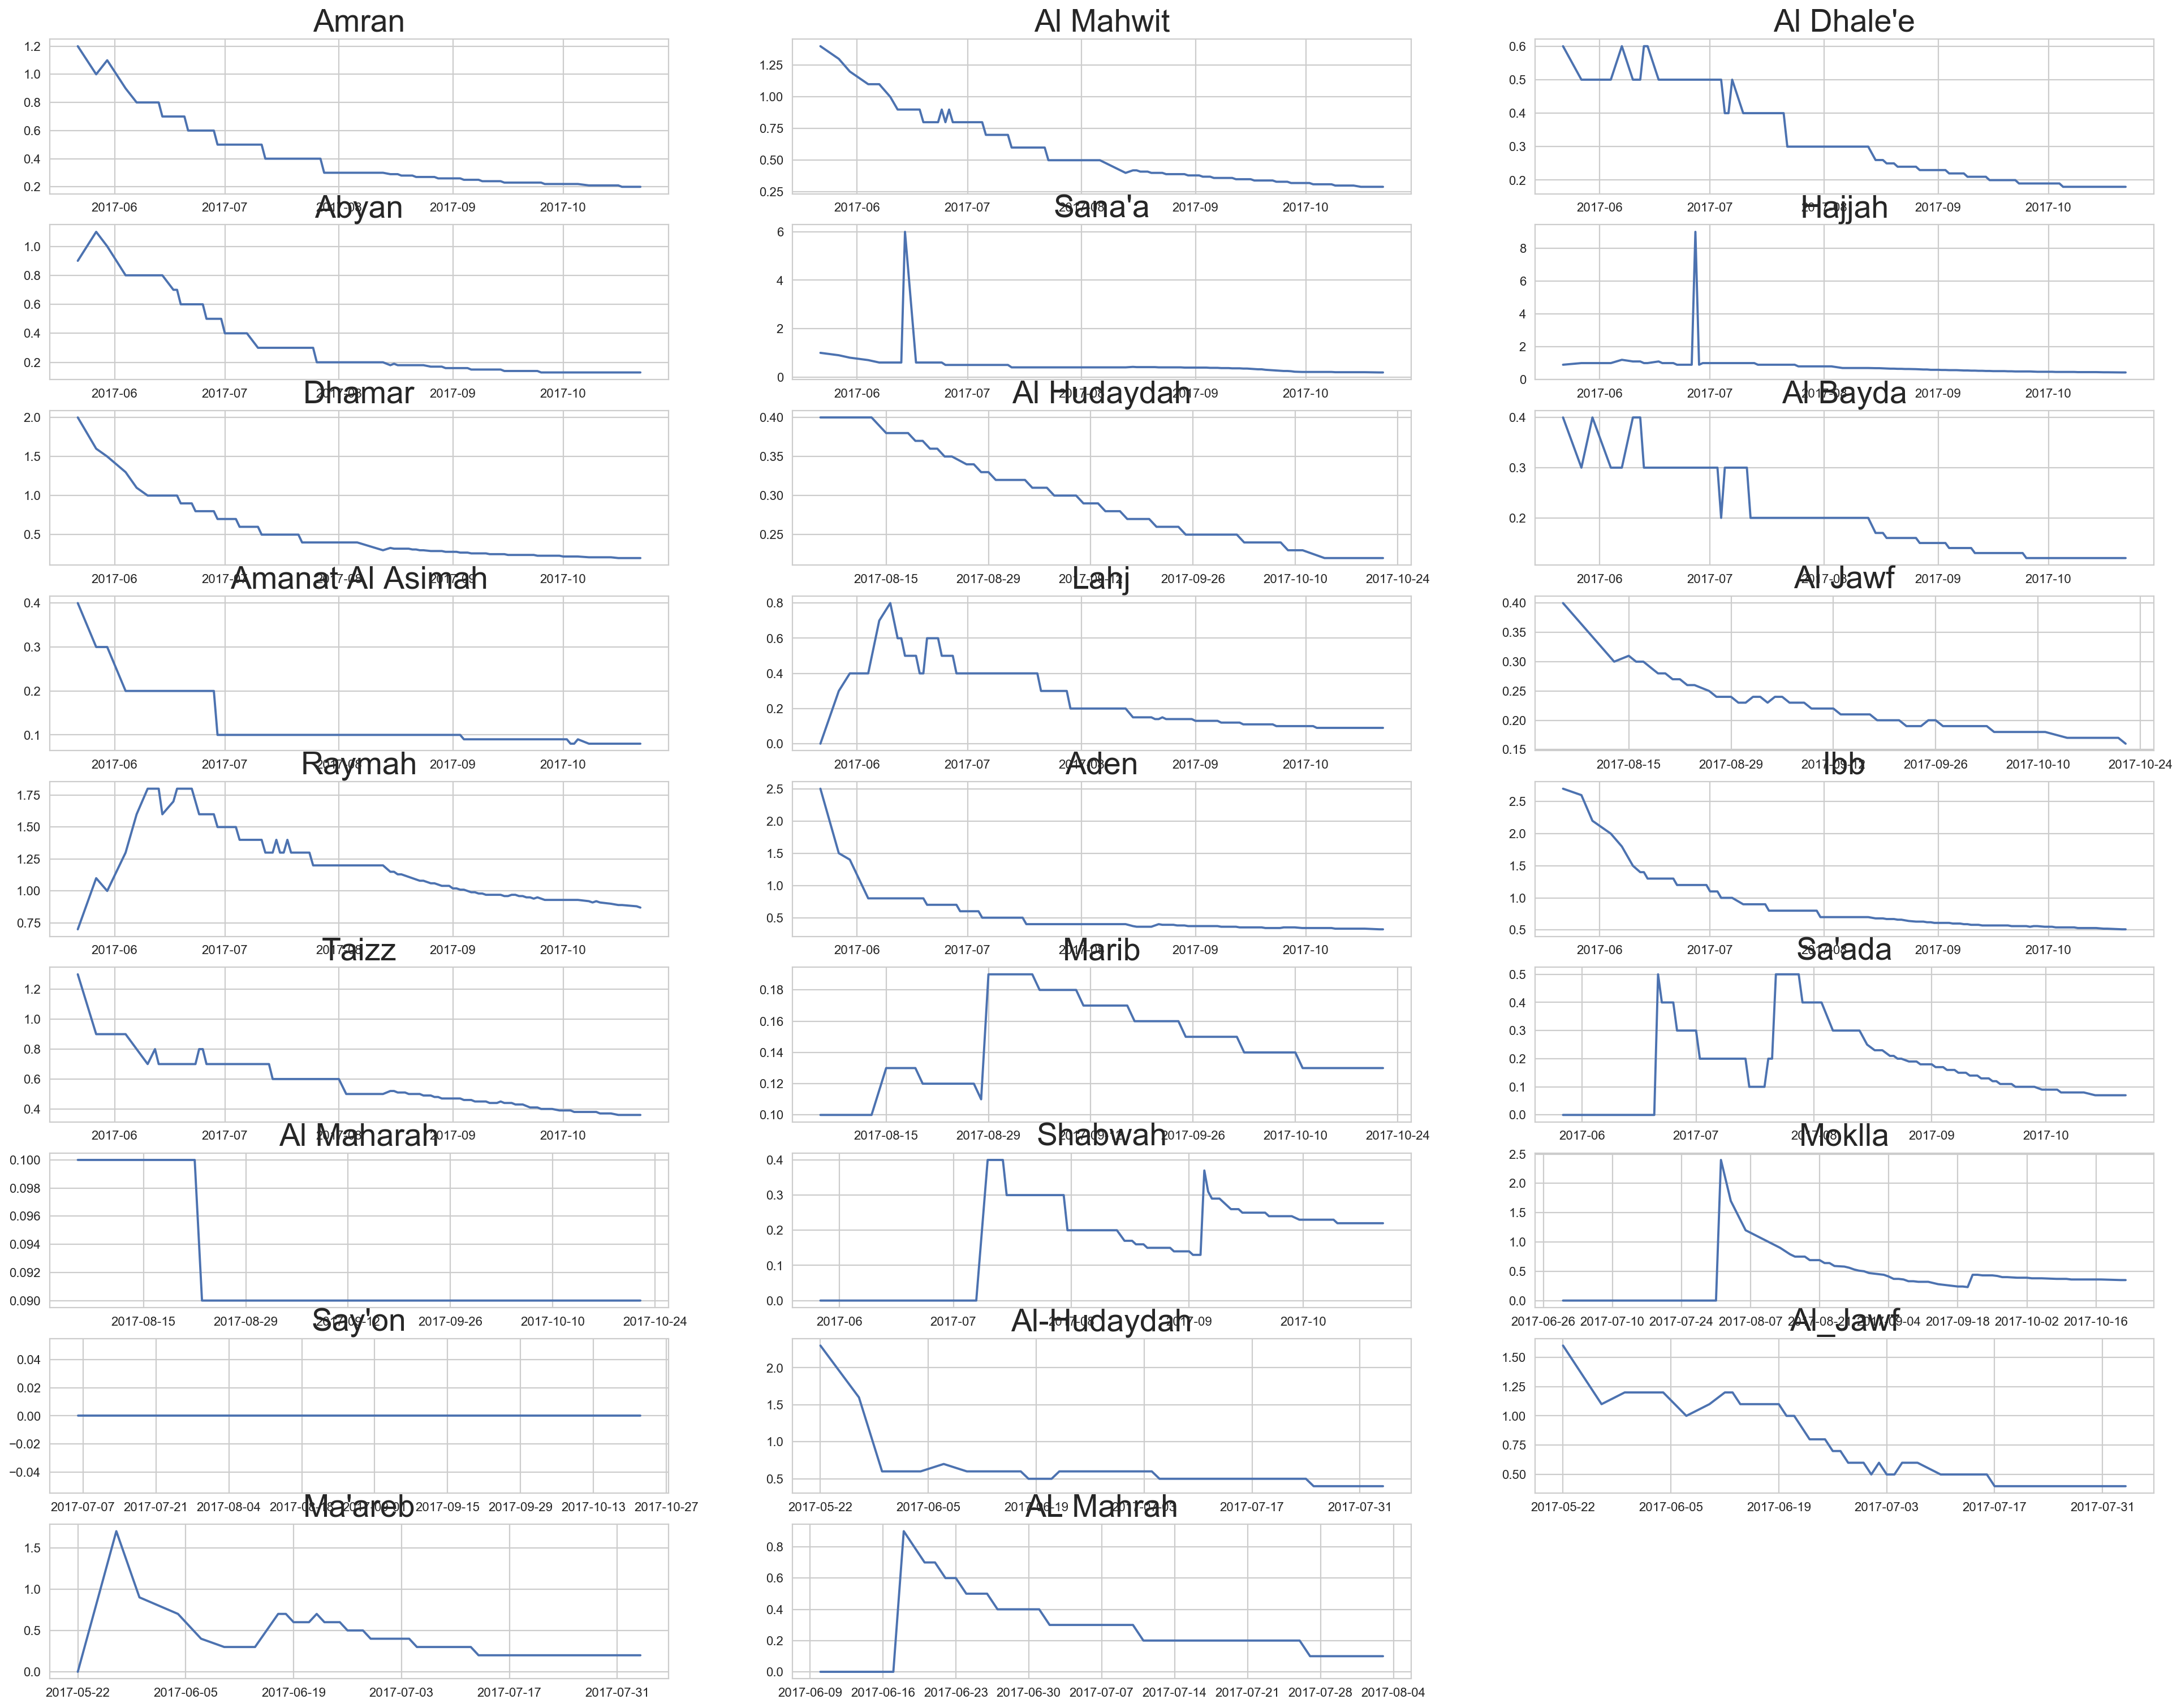

In [305]:
# Plot cholera attack rate/ CFR / Deaths for each governorate

#variableToPlot = 'AttackRate'
variableToPlot = 'CFR' # Case Fatality Rate
#variableToPlot = 'Deaths'

fig4 = plt.figure(figsize=(30,15), dpi=60)

for i in range(0,GovListlength):
    plt.plot(dataframe_collection[i]['Date'], dataframe_collection[i][variableToPlot], label=GovList[i])

plt.title(variableToPlot,fontsize=25)
plt.ylabel(variableToPlot,fontsize=25)
plt.xlabel('Date',fontsize=25)
plt.legend(prop={'size': 18})

fig5 = plt.figure(figsize=(30,24), dpi=160)

nColumns = 3
nRows = 9
for i in range(0,GovListlength):
        
    ax = plt.subplot2grid((nRows,nColumns),(i//nColumns,i%nColumns))
    plt.plot(dataframe_collection[i]['Date'], dataframe_collection[i][variableToPlot])
    #plt.ylim((0,125000))
    plt.title(GovList[i],fontsize=25)  

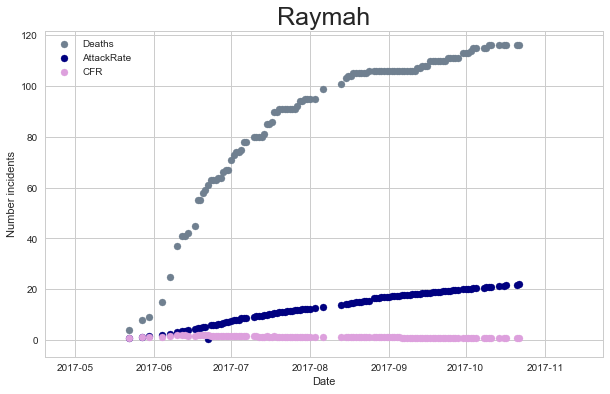

In [306]:
# scatter plot for one governorate
govNumber = 12
cases  = dataframe_collection[govNumber].Cases
deaths = dataframe_collection[govNumber].Deaths
attackRate = dataframe_collection[govNumber].AttackRate
CFR = dataframe_collection[govNumber].CFR

dates  = [pd.to_datetime(d) for d in dataframe_collection[govNumber].Date]
#plt.scatter(dates,cases ,c = 'darkcyan'  , label='Cases')
plt.scatter(dates,deaths,c = 'slategray', label='Deaths')
plt.scatter(dates,attackRate,c = 'navy', label='AttackRate')
plt.scatter(dates,CFR,c = 'plum', label='CFR')
plt.ylabel('Number incidents')
plt.xlabel('Date')
plt.title(GovList[govNumber],fontsize=25)
plt.legend()

# Look at mapping data

In [314]:
import folium

In [315]:
# Define latitude and longitude Yemen
Yemen = [15.55, 48.51]
m_map = folium.Map(location= Yemen, zoom_start=6)

#m_map = folium.Map(width=800, height=400, tiles = "Stamen Toner", zoom_start=6, location= Yemen)

In [316]:
# Read file with lat and long of major town in each governorate
fname2 = path.expanduser('~/Desktop/OpenData/YemenGovernorateLongLat.xlsx')
dfLongLat = pd.read_excel(fname2)

# load values into arrays
lat_governorate = np.zeros(GovListlength)
lon_governorate = np.zeros(GovListlength)

for i in range(0,GovListlength):
    lat_governorate[i] = dfLongLat.Lat.iloc[i]
    lon_governorate[i] = dfLongLat.Long.iloc[i]

In [317]:
# Draw circle on map with radius scaled to number of cases in governorate
r_weight = 500000.
r_governorate = np.zeros(26)
for i in range(0,GovListlength):
    r_governorate[i] = dataframe_collection[i].Cases.sum()/r_weight

In [318]:
# remove apostrophe in names for map. Seems to fail otherwise
for i in range(0,GovListlength):
    GovList[i] = GovList[i].replace("'", '')

In [319]:
# Draw map with circles
c_color = 'blue'

for i in range(0,GovListlength):
#for i in range(0,10):
    lat = lat_governorate[i]
    long = lon_governorate[i]    
    if r_governorate[i]>0:
        #print (GovList[i]," [",lat,",",long,"] r=",r_governorate[i])
        folium.CircleMarker([lat, long],
                            radius= r_governorate[i],
                            popup = GovList[i],
                            color = c_color,
                            fill  = True,
                            fill_color = c_color,
                           ).add_to(m_map)
m_map

In [241]:
mapf = folium.Map(width=800, height=400, tiles = "Stamen Toner", zoom_start=6, location= Yemen)
mapf